# Predicting wine quality through physicochemical features

## Table of Contents
1. [Introduction](#intro)
2. [Data Collection](#datacoll)
3. [Data Transformation](#datatransf)
4. [Data Analysis & Visualisations](#analysis)
5. [Results](#results)
6. [Recommendations](#recommendations)

## 1. Introduction <a class="anchor" id="intro"></a>

### Research Question

<i>Are wine preferences correlated to a wine’s physicochemical composition, and can we predict a wine quality based on these features?</i>

### Executive Summary

<p>The project aims to explore the correlation between their physicochemical composition in relation to their quality scores, and further predict wine quality using regression modelling.</p>
<p>Through exploratory analysis and applying statistical techniques, chemical components that indicate a higher likelihood of lower or higher wine quality were used as key features to train a linear regression model.</p>
<p>The results indicated features such as “alcohol” and “density” moderately correlate with wine quality (p-value < 0.05 and respective correlation coefficients of 0.44 and -0.31), but low overall predictability (R-Squared of 0.4857 and Mean Squared Value of 0.402).</p>


## 2. Data Collection <a class="anchor" id="datacoll"></a>
“Vinho verde” quality data was sourced from UC Irvine Machine Learning Repository, donated by Professor Paulo Cortez from University of Minho. The dataset consisting of two Comma Separated Values (CSV) files for red and white wines is available from [UCI Irvine](https://archive.ics.uci.edu/dataset/186/wine+quality). Only physicochemical (inputs) and sensory (the output) variables are available due to privacy and logistic issues (Cortez et al., 2009).
<p>The dataset contains eleven essential variables of physicochemical features described in table 1, and one quality variable. “Quality” was graded by wine experts, possibly subjected to human error or personal preference bias.</p>

## 3. Data Transformation <a class="anchor" id="datatransf"></a>
### Libraries
* <b>Pandas</b> - its primarily applications are data cleaning, transformations and manipulations.
* <b>NumPy</b> - used for working with arrays and apply statistical functions
* <b>Matplotlib</b> - intuitive library used to produce statistical visualisations in Python.
* <b>Seaborn</b> - builds on top of matplotlib and integrates closely with Panda’s data structures, enhancing statistical graphing.
* <b>Scikit Learn</b> - preferred library for machine learning applications
* <b>SciPy</b> - consisting of algorithms for scientific computing and more advanced statistical functions

In [24]:
## Libraries for data transformation were imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Transformations
<p>Both red and white datasets were appended data frame using Python’s Pandas library. “Red” and “white” values were added in a column named “colour” as colours may present different characteristics.</p>

In [25]:
## Importing both winequality-red.csv and winequality-white.csv, using Pandas
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

## Inserting a new column containing values 'red' or 'white' for respective 'colour'
df_red.insert(0, 'colour', 'red')
df_white.insert(0, 'colour', 'white')

## Joining both datasets and assessing its general quality
df = df_white.append(df_red).reset_index(drop=True)
display(df)

C:\Users\danif\AppData\Local\Temp\ipykernel_30772\1106026031.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_white.append(df_red).reset_index(drop=True)


,colour,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
## Statistical description of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<p>Data quality dimensions such as completeness, validity and accuracy were assessed using the Government Data Quality Framework, which states that poor or unknown quality data weakens evidence and leads to poor outcomes</p>
<p>No missing values were identified. Formatting, column naming conventions and table structures were consistent, and accuracy was validated in columns such as “pH” where values ranged in accordance with the pH scale.</p>

In [27]:
## Assessing completeness
for c in df.columns:
    null_count = df[c].isna().sum()
    print(c + ': ' + str(null_count))

colour: 0
fixed acidity: 0
volatile acidity: 0
citric acid: 0
residual sugar: 0
chlorides: 0
free sulfur dioxide: 0
total sulfur dioxide: 0
density: 0
pH: 0
sulphates: 0
alcohol: 0
quality: 0


## 4. Data Analysis & Visualisations <a class="anchor" id="analysis"></a>
An imbalance in values on extremes of "quality" can be identified in the dataframe below.

In [28]:
## Understanding imbalance on 'quality' as the dependent variable
pd.DataFrame(df[['colour','quality']].groupby(['quality', 'colour'])['quality'].count())

quality
quality colour         
3       red          10
        white        20
4       red          53
        white       163
5       red         681
        white      1457
6       red         638
        white      2198
7       red         199
        white       880
8       red          18
        white       175
9       white         5

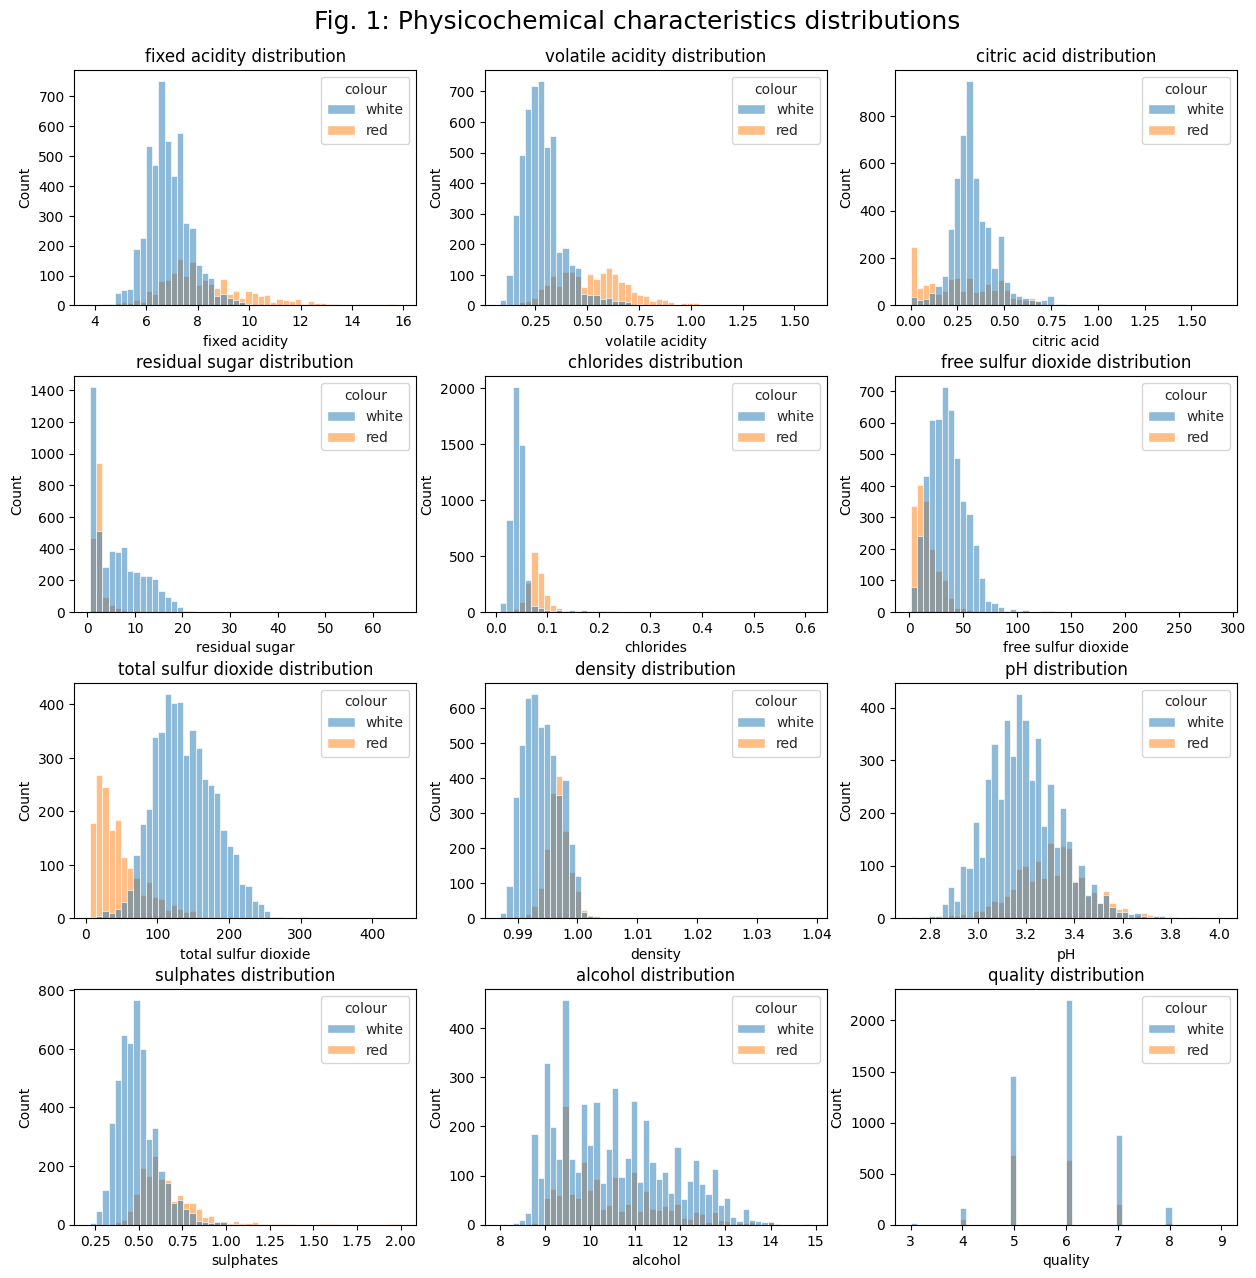

In [29]:
## Importing Matplotlib and Seaborn to produce insightful data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

## Displaying a distribution matrix for each physicochemical characteristic, by colour
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
plt.subplots_adjust(hspace=0.3)
fig.suptitle('Fig. 1: Physicochemical characteristics distributions', fontsize=18, y=0.92)

with sns.axes_style(style='whitegrid'):
    for n, ax in enumerate(axs.flatten()):
        sns.histplot(data=df, x=df.iloc[:,n+1], ax=ax, hue='colour', bins=50).\
            set_title(df.columns[n+1] + " distribution")

<b> Distribution summary (fig. 1): </b>
* Red and white wines present distinct characteristics, meaning each wine might present different quality correlations. These differences are particularly evident in levels of chlorides, volatile acidity and total sulfur dioxide.
* Quality is distributed similarly for both types of wine, with an imbalance towards mediocre wines with few low and high-quality wines.


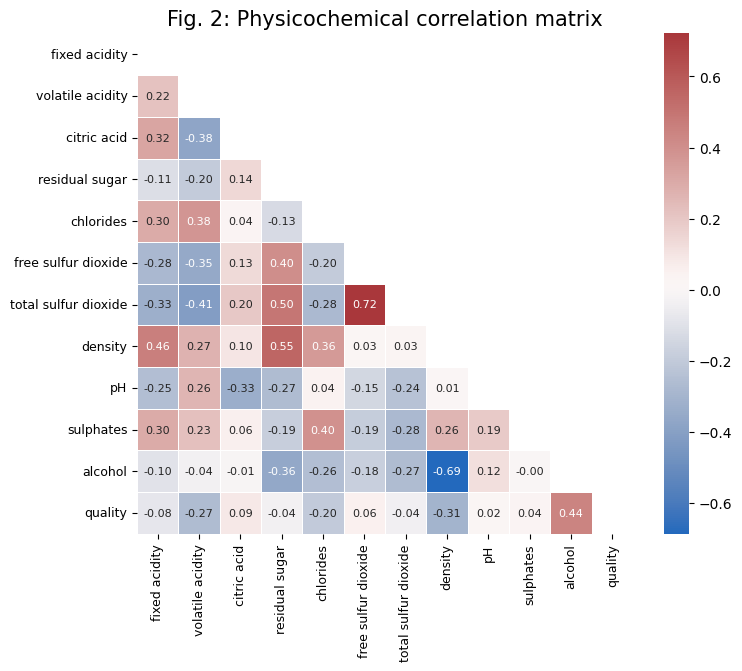

In [30]:
## Calculating correlation coefficients for all features except categorical feature 'colour'
wine_corr = df.iloc[:,1:].corr()

## Creating a mask to eliminate repeated values from correlation matrix
mask = np.triu(np.ones_like(wine_corr, dtype=bool))

## Visualising the correlation matrix
fig, ax = plt.subplots(figsize=(8,6.5))
sns.heatmap(wine_corr, mask=mask, cmap="vlag", annot=True,
            fmt=".2f", linewidth=.5, annot_kws={"fontsize":8}).\
    set_title("Fig. 2: Physicochemical correlation matrix", fontsize=15)
ax.tick_params(labelsize=9)

<b>Pearson's Correlation Coefficient (fig. 2)</b>
<p>Correlation coefficients were measured using the NumPy library function <i>corr()</i> to express the extent to which two variables are linearly related (figure 2). Strong positive correlations were identified such as total sulfur dioxide and free sulfur dioxide plus residual sugars, and strong negative correlation between alcohol and density.</p>

In [31]:
## Importing Scipy pearsonr to calculate correlation coefficients and respective p-values to assess statistical significance
from scipy.stats import pearsonr

## Creating an empty list to store results
corr_results = []

## Performing Pearson correlation
for f in df.iloc[:,1:].columns:
    if f != 'quality':
        corr, p_value = pearsonr(df.iloc[:,1:][f], df.iloc[:,1:]['quality'])
        corr_results.append({
            'Feature': f,
            'Pearson correlation': corr,
            'p-value': p_value
        })

## Displaying the Pearson correlation results
corr_results = pd.DataFrame(corr_results)
display(corr_results)

,Feature,Pearson correlation,p-value
0,fixed acidity,-0.076743,5.874849e-10
1,volatile acidity,-0.265699,2.061959e-105
2,citric acid,0.085532,5.001764e-12
3,residual sugar,-0.036980,2.871025e-03
4,chlorides,-0.200666,5.316452e-60
5,free sulfur dioxide,0.055463,7.708445e-06
6,total sulfur dioxide,-0.041385,8.480397e-04
7,density,-0.305858,9.662665e-141
8,pH,0.019506,1.159310e-01
9,sulphates,0.038485,1.918079e-03


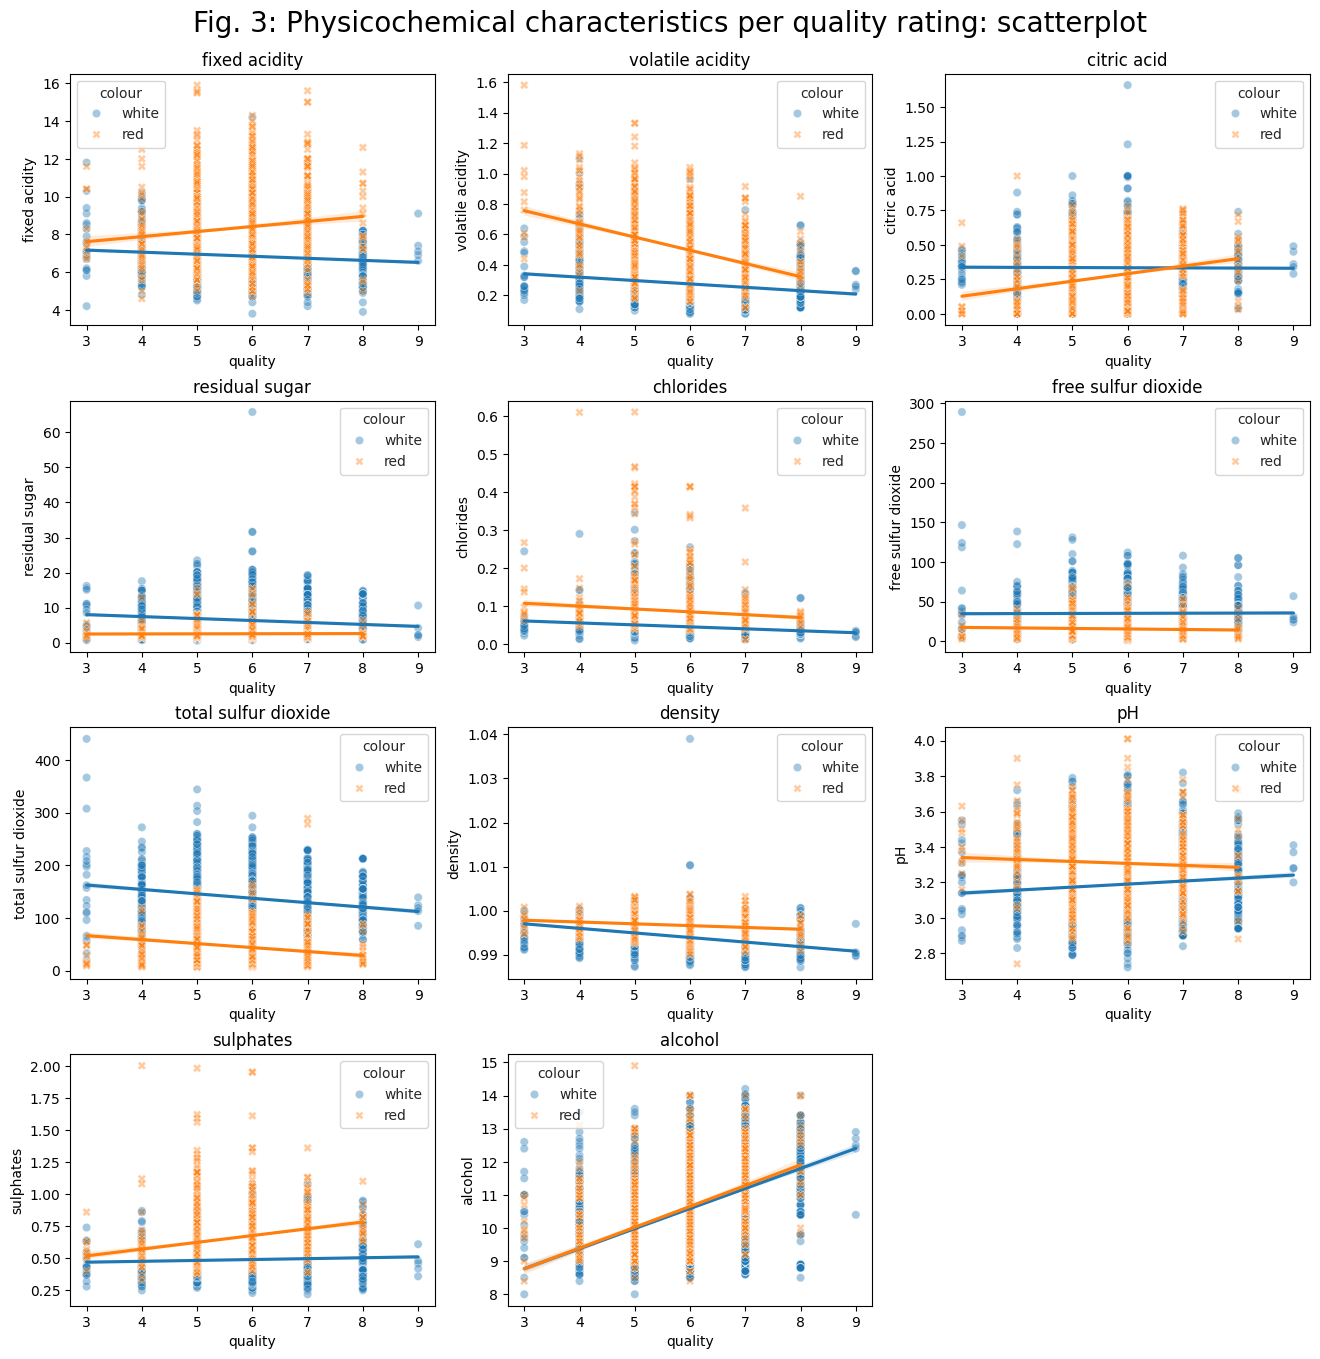

In [32]:
## Splitting the dataset into two separate ones for each wine colour
df_red = df[df['colour']=='red']
df_white = df[df['colour']=='white']

## Creating scatter plots to visualise the relationship between dependent and independent variables
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16,16))
fig.delaxes(ax=axs[3,2])
plt.subplots_adjust(hspace=0.3)
fig.suptitle('Fig. 3: Physicochemical characteristics per quality rating: scatterplot', fontsize=20, y=0.92)

with sns.axes_style(style='whitegrid'):
    for n, ax in enumerate(axs.flatten()):
        sns.scatterplot(data=df, x='quality', y=df.iloc[:,n+1], ax=ax, hue='colour', style='colour', alpha=0.4)
        sns.regplot(data=df_white, x='quality', y=df_white.iloc[:,n+1], ax=ax, scatter=False)
        sns.regplot(data=df_red, x='quality', y=df_red.iloc[:,n+1], ax=ax, scatter=False)
        ax.set_title(df.columns[n+1])

<b>Visualising relationships between features and quality (fig. 3)</b>
<p>Physicochemical characteristics in relation to the dependent variable (quality) were represented in figure 5 using scatter plots to visualise the relationship between dependent and independent variables, albeit proven difficult to access its linearity due to high dispersion.</p>
<p>To further analyse the relationship between dependent an independent variables, a multiple linear regression will be implemented below on all wine colours, then by separate wine.</p>

In [33]:
## Importing libraries for first fit of a Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Changing categorical variables to integers
df['colour'] = [1 if c == 'red' else 0 for c in df['colour']]

### Multiple Linear Regression pipeline

In [34]:
def regression_pipeline(dataframe):
    X = dataframe.drop('quality', axis=1) # defining features
    y = dataframe['quality'] # defining target variable

    ## Spliting into training & test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    # oversampler = RandomOverSampler() #comment to try without oversampling
    # X_train, y_train = oversampler.fit_resample(X_train, y_train)
    
    model = LinearRegression() # defining the model
    model.fit(X_train, y_train) # training the model
    y_pred = model.predict(X_test) # predicting

    ## Model metrics
    mse = mean_squared_error(y_test, y_pred) # calculating Mean Squared Error
    r2 = r2_score(y_test, y_pred) # calculating R Squared
    
    ## OLS regression
    X_train_resampled_const = sm.add_constant(X_train)
    sm_model = sm.OLS(y_train, X_train_resampled_const).fit()
    t_values = sm_model.tvalues
    p_values = sm_model.pvalues

    ## VIF 
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    ## Feature metrics
    results = []
    for feature in X.columns:
        X_train_feature = X_train[[feature]]
        X_test_feature = X_test[[feature]]

        model.fit(X_train_feature, y_train)
        y_pred = model.predict(X_test_feature)

        feature_mse = mean_squared_error(y_test, y_pred)
        feature_r2 = r2_score(y_test, y_pred)

        results.append({
            'Feature': feature,
            'Mean Squared Error': feature_mse,
            'R-squared': feature_r2,
            't-value': t_values[feature],
            'p-value': p_values[feature],
            'VIF': vif_data.loc[vif_data['feature'] == feature, 'VIF'].values[0]
        })

    return print(f"Mean Squared Error: {mse}"),\
           print(f"R-squared: {r2}"),\
           display(pd.DataFrame(results))

In [35]:
print("Results applying multiple linear regression using colour as a feature:")
regression_pipeline(df)

Results applying multiple linear regression using colour as a feature:
Mean Squared Error: 0.5215599832039568
R-squared: 0.3021971232865994


,Feature,Mean Squared Error,R-squared,t-value,p-value,VIF
0,colour,0.739513,0.010595,4.811475,1.546856e-06,6.916837
1,fixed acidity,0.743727,0.004956,4.682320,2.919316e-06,72.509502
2,volatile acidity,0.691696,0.074570,-15.026111,7.709554e-50,11.669464
3,citric acid,0.741617,0.007780,-1.591400,1.115892e-01,9.461889
4,residual sugar,0.746217,0.001625,9.038958,2.295841e-19,3.533979
5,chlorides,0.721266,0.035007,-1.555912,1.197989e-01,6.216244
6,free sulfur dioxide,0.744211,0.004309,4.424090,9.912058e-06,8.532921
7,total sulfur dioxide,0.745810,0.002169,-3.639555,2.761528e-04,20.327319
8,density,0.674714,0.097291,-6.134554,9.267301e-10,1044.705161
9,pH,0.747324,0.000144,4.548729,5.537982e-06,666.253592


(None, None, None)

A multiple regression was applied to the dataset to further validate its linearity. Results depicted in figure 6 indicate a very high degree of multicollinearity (VIF > 5) and low predictability with R-squared close to 0 for all features.

In [36]:
## Removing "colour" column as both sets are split
df_red, df_white = df_red.drop(columns='colour').reset_index(drop=True),\
                   df_white.drop(columns='colour').reset_index(drop=True)

In [38]:
## Multiple Linear Regression applied to red wines
print('> Linear Regression applied to red wines:\n')
regression_pipeline(df_red)

## Multiple Linear Regression applied to white wines
print('> Linear Regression applied to white wines:\n')
regression_pipeline(df_white)

> Linear Regression applied to red wines:

Mean Squared Error: 0.41103791253127075
R-squared: 0.35898784995800204


,Feature,Mean Squared Error,R-squared,t-value,p-value,VIF
0,fixed acidity,0.635279,0.009284,0.601439,5.476709e-01,77.195241
1,volatile acidity,0.542924,0.153312,-8.368728,1.738541e-16,17.051783
2,citric acid,0.606429,0.054276,-1.893963,5.849037e-02,9.706814
3,residual sugar,0.641297,-0.000101,0.158244,8.742938e-01,4.626137
4,chlorides,0.633344,0.012302,-3.415509,6.597213e-04,6.741423
5,free sulfur dioxide,0.641079,0.000240,2.235133,2.560745e-02,6.334599
6,total sulfur dioxide,0.613690,0.042953,-3.999076,6.780887e-05,6.232349
7,density,0.615536,0.040074,-0.117048,9.068434e-01,1484.893773
8,pH,0.640911,0.000501,-2.257144,2.419334e-02,1076.761459
9,sulphates,0.595659,0.071072,5.962193,3.342805e-09,21.191558


> Linear Regression applied to white wines:

Mean Squared Error: 0.5956375605433991
R-squared: 0.24205466703202416


,Feature,Mean Squared Error,R-squared,t-value,p-value,VIF
0,fixed acidity,0.779181,0.008497,4.001468,6.428618e-05,93.732885
1,volatile acidity,0.755959,0.038046,-13.774040,4.760384e-42,10.174832
2,citric acid,0.786316,-0.000582,-0.110339,9.121471e-01,10.234217
3,residual sugar,0.782985,0.003657,9.993827,3.367258e-23,3.999695
4,chlorides,0.749830,0.045845,0.234454,8.146466e-01,6.687730
5,free sulfur dioxide,0.785849,0.000011,3.861240,1.149023e-04,9.581817
6,total sulfur dioxide,0.761135,0.031460,0.382004,7.024821e-01,24.986316
7,density,0.736108,0.063306,-7.903966,3.614894e-15,1073.942636
8,pH,0.781270,0.005838,6.856379,8.346760e-12,603.465597
9,sulphates,0.785989,-0.000166,5.906384,3.839669e-09,20.890243


(None, None, None)

### Analytical conclusions
<p>Given the analysis on distributions, correlation coefficients, dispersion and regression, results indicate a multiple linear regression is not the suitable solution to predict wine quality: the relationship might be non-linear, and the data is imbalanced.</p>
<p>A Random Forest Regressor was chosen as it is less prone to overfitting than other regression methods since it builds multiple random trees independently and averages them out at the end of its prediction process 
</p>

## 5. Results <a class="anchor" id="results"></a>
<b>Creating a Random Forest Regressor pipeline</b>

In [44]:
def random_forest_pipeline(dataframe):
    X = dataframe.drop('quality', axis=1)  # defining features
    y = dataframe['quality']  # defining target variable
    
    # Splitting into training & test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
    
    # Defining, fitting & predicting Random Forest Regressor
    model = RandomForestRegressor(random_state=14)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculating metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    # Results
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Explained Variance Score: {evs:.4f}")

    # Feature importances
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importances:")
    print(feature_importances)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect prediction
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Fig. 4: Actual vs. Predicted Values')
    plt.show()

Using Scikit Learn’s Random Forest Regression in Python for its ease of implementation, a pipeline function was developed to split the data into train and test sets, fit the model, and evaluate its performance using key metrics such as:
* R-squared for its reliability to quantify how much the dependent variable is determined by the independent variables, in terms of proportion of variance.
* Mean Squared Error to assess the average squared difference between observed and predicted values.

R-squared: 0.4857
Mean Squared Error: 0.4021
Root Mean Squared Error: 0.6341
Explained Variance Score: 0.4861

Feature Importances:
                 Feature  Importance
11               alcohol    0.269379
2       volatile acidity    0.131787
6    free sulfur dioxide    0.083019
10             sulphates    0.074794
7   total sulfur dioxide    0.071139
9                     pH    0.068795
4         residual sugar    0.067043
5              chlorides    0.063497
8                density    0.056833
3            citric acid    0.056492
1          fixed acidity    0.056160
0                 colour    0.001061


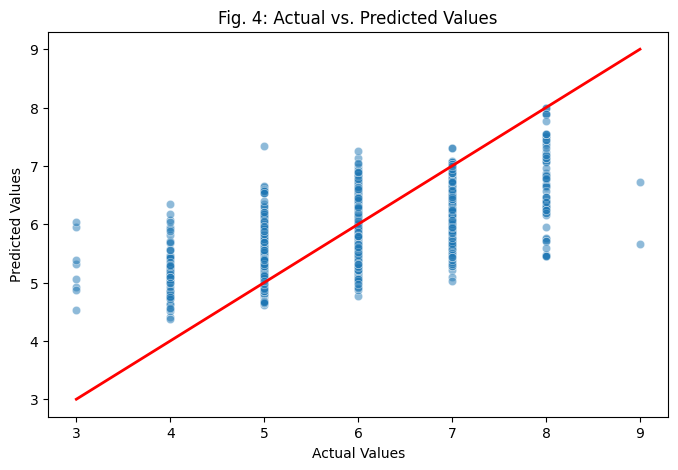

In [45]:
random_forest_pipeline(df)

<p>Results indicate that the Random Forest Regression has low predictability (R-squared 0.4857).</p>
<p>By analysing figure 7, we conclude that the predicted values are more accurately attributed to better balanced quality scores ranging between 5 and 7, yet each extreme tends to be either over-estimated or under-estimated.</p>
<p>In summary, physicochemical characteristics of “vinho verde” present low correlations with wine quality due to non-linear relationships, and we can’t confidently predict wine quality in a quantitative manner. Alternative approaches such as classification and further data transformations could enhance the predictability of wine quality.</p>


## 6. Recommendations <a class="anchor" id="recommendations"></a>
### Data collection
<p>Wine quality assessments by experts may be prone to human error and bias, potentially affecting data accuracy. Errors in data entry could significantly alter statistical results, such as correlations and t-tests, or introduce multicollinearity.</p>
<p>Additionally, it's unclear whether experts tasted wines anonymously, which could lead to bias based on personal preferences or brand familiarity. To reduce these risks, more rigorous data validation, equipment calibration, and peer review are recommended.</p>

### Alternative solutions for predictive analysis
<p>Predictive analysis includes methods to improve accuracy, such as addressing imbalances in extreme scores. Random Forest often prioritizes accuracy for the majority class, leading to lower accuracy for the minority class.</p>
<p>Categorizing quality scores into "low," "medium," and "high" can help balance these extremes. Decision Tree Classification is a more interpretable alternative to Random Forest Regression for classification tasks and is effective at solving non-linear problems.</p>

### Ethical considerations
<p>Even if a model is accurate, using wine quality predictions in real life could lead to some high-quality products being wrongly discarded, which is wasteful. These predictions could also make the market more competitive, potentially harming small-scale producers with low profit margins due to the need for significant computational resources, large datasets, and skilled personnel.</p>